First, let's read the data info dataframes so they can be easily manipulated

In [305]:
import pandas as pd
import numpy as np

You need to specify file name, separator and headers positions in file

In [306]:
data = pd.read_csv('./Specimen_RawData_2.csv', sep=';', header=[4, 5])

In [307]:
data

,Godzina,Przemieszczenie,obci��enie,Napr�enie �ciskaj�ce,Odkszta�cenie przy �ciskaniu (Przemieszczenie)
,(s),(mm),(N),(MPa),(mm/mm)
0,"0,00000","0,01127","64,86787","4,98598","-0,00001"
1,"0,10000","0,01127","64,68802","4,97216","-0,00001"
2,"0,20000","0,01119","64,47034","4,95543","-0,00003"
3,"0,30000","0,01118","64,39904","4,94995","-0,00003"
4,"0,40000","0,01118","64,29066","4,94162","-0,00003"
5,"0,50000","0,01118","64,16225","4,93175","-0,00003"
6,"0,60000","0,01127","64,06751","4,92447","-0,00001"
7,"0,70000","0,01127","63,95906","4,91613","-0,00001"
8,"0,80000","0,01127","63,93674","4,91441","-0,00001"


In [308]:
def toFloat(text):
    return float(text.replace(',', '.'))

** Kolumna True strain [%] **

ln(1-(Odkształcenie przy ściskaniu (Przemieszczenie)))*100

In [309]:
data[('True strain', '%')] = -np.log(1-(data[data.columns[4]].map(toFloat))) * 100

**Kolumna True stress [MPa]**

(Naprężenie ściskające)*(1-(Odkształcenie przy ściskaniu (Przemieszczenie)))

In [310]:
data[('True stress', 'MPa')] = data[data.columns[3]].map(toFloat)*(1-data[data.columns[4]].map(toFloat))

In [311]:
data

,Godzina,Przemieszczenie,obci��enie,Napr�enie �ciskaj�ce,Odkszta�cenie przy �ciskaniu (Przemieszczenie),True strain,True stress
,(s),(mm),(N),(MPa),(mm/mm),%,MPa
0,"0,00000","0,01127","64,86787","4,98598","-0,00001",-0.001000,4.986030
1,"0,10000","0,01127","64,68802","4,97216","-0,00001",-0.001000,4.972210
2,"0,20000","0,01119","64,47034","4,95543","-0,00003",-0.003000,4.955579
3,"0,30000","0,01118","64,39904","4,94995","-0,00003",-0.003000,4.950098
4,"0,40000","0,01118","64,29066","4,94162","-0,00003",-0.003000,4.941768
5,"0,50000","0,01118","64,16225","4,93175","-0,00003",-0.003000,4.931898
6,"0,60000","0,01127","64,06751","4,92447","-0,00001",-0.001000,4.924519
7,"0,70000","0,01127","63,95906","4,91613","-0,00001",-0.001000,4.916179
8,"0,80000","0,01127","63,93674","4,91441","-0,00001",-0.001000,4.914459


In [312]:
strain = data[('True strain', '%')]

In [313]:
stress = data[('True stress', 'MPa')]

In [314]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

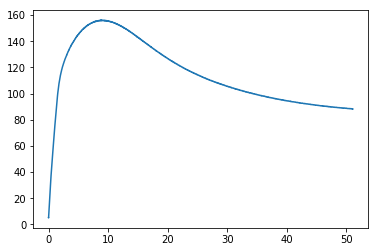

In [315]:
plt.plot(strain, stress)

Parameters below determins max length of the straight line and max MSE for a classifier

In [316]:
MAX_LINE_END = strain.shape[0]/20
MAX_ERROR = 5

In [317]:
def get_classifier(strain, stress):
    for i in range(10, MAX_LINE_END):
        lr = linear_model.LinearRegression()
        x = [[strain[j]] for j in xrange(i)]
        y = stress[0:i]
        lr.fit(x, y)
        predicted = lr.predict(x)
        mse = mean_squared_error(y, predicted)
        
        if mse > MAX_ERROR:
            return (lr, i)


lr is selected classifier and l is number if sampels in linear region

The code belows takes a while to execute :(

In [319]:
(lr, l) = get_classifier(strain, stress)

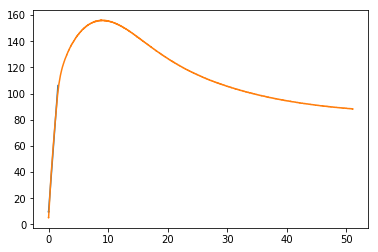

In [320]:
line_x = strain[0:l]
predicted = lr.predict([[strain[j]] for j in xrange(l)])
plt.plot(line_x, predicted)

plt.plot(strain, stress)

plt.show()


Let's extract linear classifier parameters

In [321]:
a = lr.coef_[0]
b = lr.intercept_

And move predicted stress line by 0.2

In [322]:
predicted_stress = a*(strain) + b
predicted_stress_moved = a*(strain - 0.2) + b

Now let's calculate where lines cross

In [301]:
idx = np.argwhere(np.diff(np.sign(predicted_stress_moved - stress)) != 0).reshape(-1)

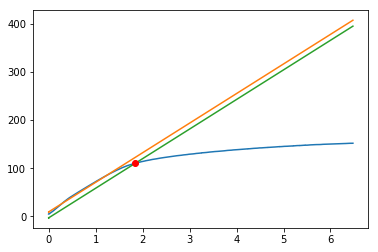

In [302]:
limit = 4*l

plt.plot(strain[0:limit], stress[0:limit])
plt.plot(strain[0:limit], predicted_stress[0:limit])
plt.plot(strain[0:limit], predicted_stress_moved[0:limit])

plt.plot(strain[idx], stress[idx], 'ro')
plt.show()

In [303]:
print "Boundary is at: ", (strain[idx[0]], stress[idx[0]])

Boundary is at:  (1.8459329924215215, 110.47849211089999)
